# Plots

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set(style = 'darkgrid', context = 'notebook')

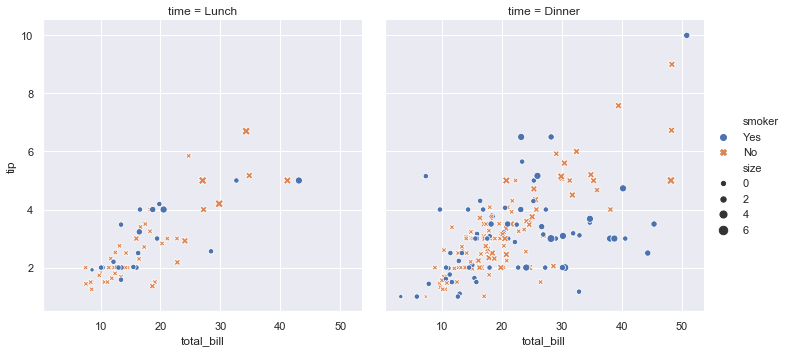

In [2]:
tips = sns.load_dataset('tips')
sns.relplot(x = 'total_bill', y = 'tip', hue = 'smoker', style = 'smoker', col = 'time', size = 'size', data = tips);

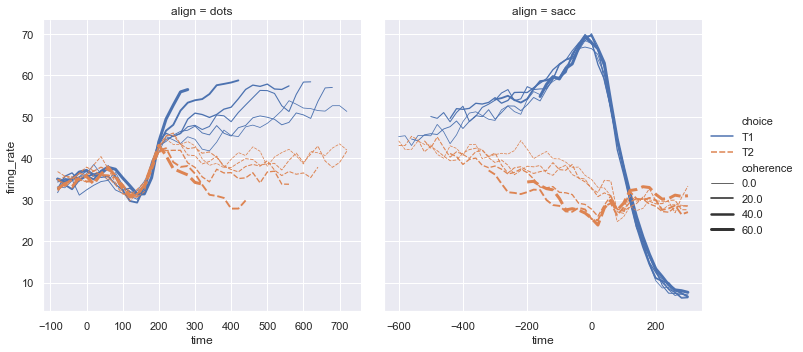

In [3]:
dots = sns.load_dataset('dots')
sns.relplot(data = dots, 
            kind = 'line', 
            x = 'time', 
            y = 'firing_rate',
            col = 'align',
            style = 'choice',
            hue = 'choice',
            size = 'coherence',
            facet_kws = dict(sharex = False));

In [4]:
fmri = sns.load_dataset('fmri')
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


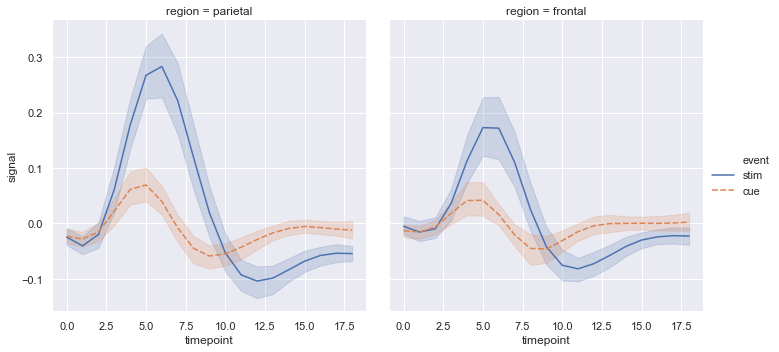

In [5]:
sns.relplot(data = fmri, 
           kind = 'line', 
           x = 'timepoint', 
           y = 'signal', 
           hue = 'event', 
           style = 'event', 
           col = 'region');

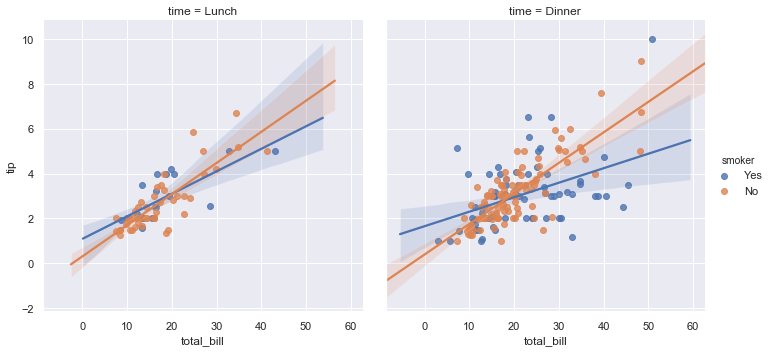

In [6]:
sns.lmplot(data = tips, 
          x = 'total_bill', 
          y = 'tip', 
          hue = 'smoker', 
          col = 'time');

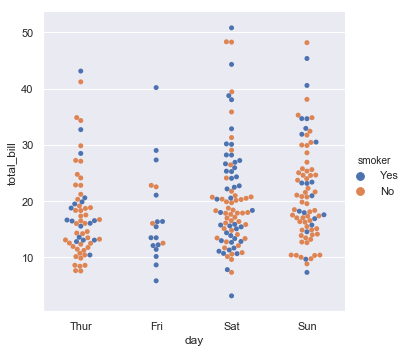

In [7]:
sns.catplot(data = tips, 
           kind = 'swarm', 
           x = 'day', 
           y = 'total_bill', 
           hue = 'smoker');

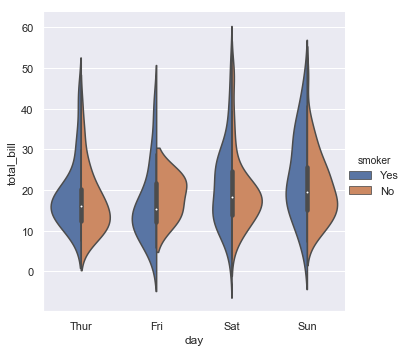

In [8]:
sns.catplot(data = tips, 
           kind = 'violin', 
           x = 'day', 
           y = 'total_bill', 
           hue = 'smoker', 
           split = True);

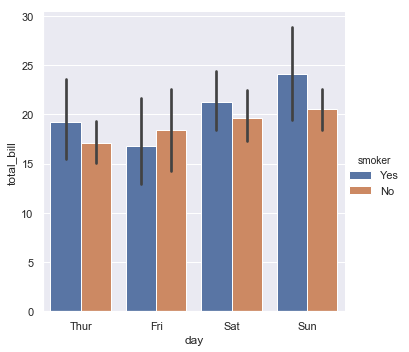

In [9]:
sns.catplot(data = tips, 
           kind = 'bar', 
           x = 'day', 
           y = 'total_bill', 
           hue = 'smoker');

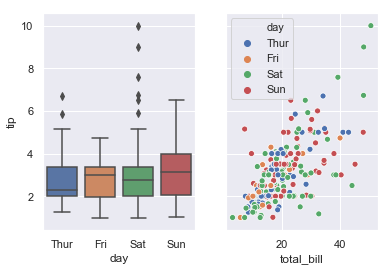

In [10]:
fig, axes = plt.subplots(1, 2, sharey = True)
sns.boxplot(data = tips, x = 'day', y = 'tip', ax = axes[0])
sns.scatterplot(data = tips, x = 'total_bill', y = 'tip', ax = axes[1], hue = 'day');

# Using relplot and catplot leads to weird stuff happening because they are figure-level functions, not axes-level functions like boxplot and scatterplot

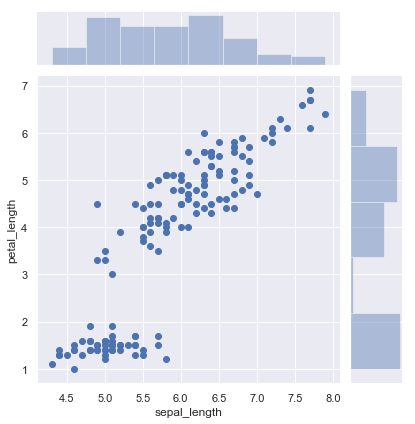

In [11]:
iris = sns.load_dataset('iris')
sns.jointplot(data = iris, x = 'sepal_length', y = 'petal_length');

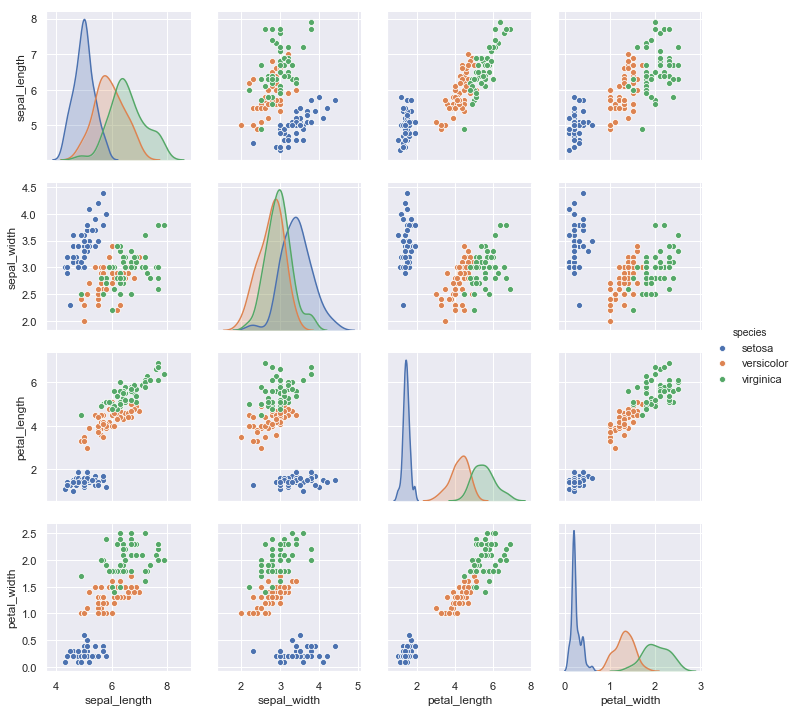

In [12]:
sns.pairplot(data = iris, hue = 'species');

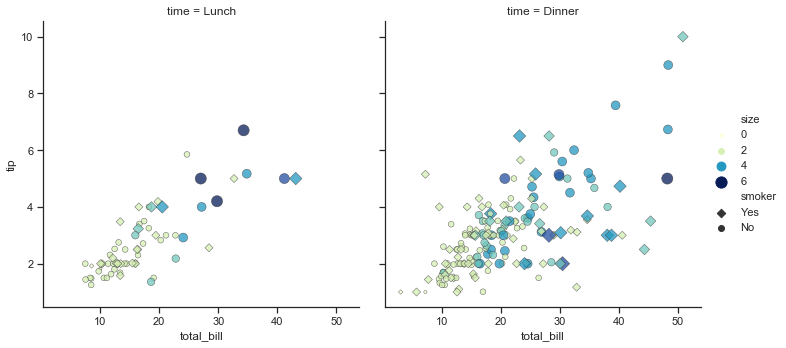

In [13]:
sns.set(style = 'ticks')
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'size', size = 'size', style = 'smoker', 
            col = 'time', palette = "YlGnBu", edgecolor = '0.2', linewidth = 0.5, alpha = 0.75, markers = ['D', 'o'], sizes = (10, 125));

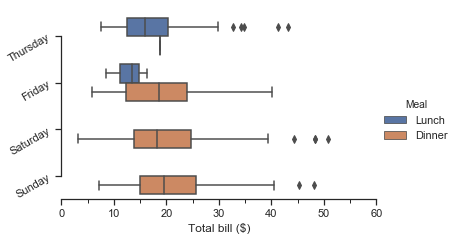

In [14]:
g = sns.catplot(data = tips, 
                x = 'total_bill', 
                y = 'day', 
                hue = 'time', 
                kind = 'box', 
                aspect = 3/2, 
                height = 3.5,
                legend = False)
g.add_legend(title = 'Meal')
g.set_axis_labels('Total bill ($)', '')
g.set(xlim = (0, 60), yticklabels = ['Thursday', 'Friday', 'Saturday', 'Sunday'])
g.despine(trim = True)
g.fig.set_size_inches(6.5, 3.5)
g.ax.set_xticks([5, 15, 25, 35, 45, 55], minor = True)
plt.setp(g.ax.get_yticklabels(), rotation = 30);
g.savefig('assets/output.png')

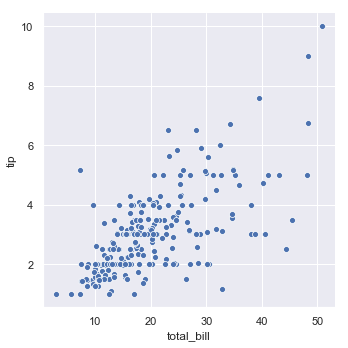

In [19]:
sns.set()
sns.relplot(data = tips, x = 'total_bill', y = 'tip');

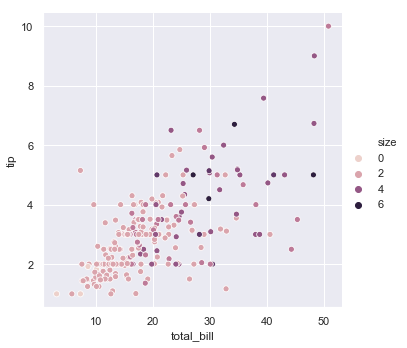

In [21]:
sns.relplot(data = tips, x = 'total_bill', y = 'tip', hue = 'size');

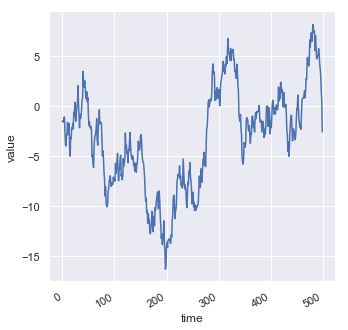

In [31]:
df = pd.DataFrame(dict(time = np.arange(500), 
                      value = np.random.randn(500).cumsum()))
g = sns.relplot(x = 'time', y = 'value', data = df, kind = 'line');
g.fig.autofmt_xdate()

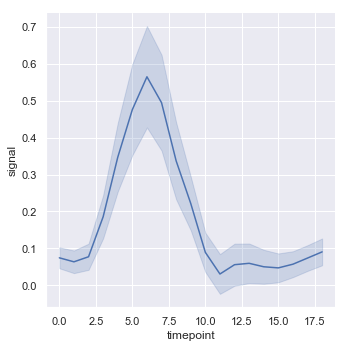

In [45]:
sns.relplot(kind = 'line', x = 'timepoint', y = 'signal', data = fmri, ci = 'sd', estimator = np.max);

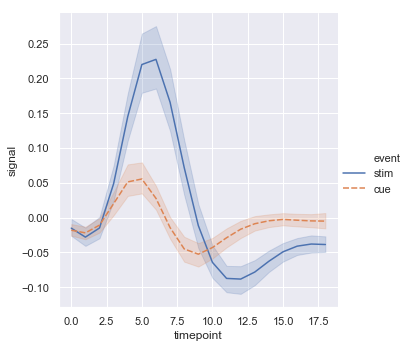

In [47]:
sns.relplot(kind = 'line', x = 'timepoint', y = 'signal', hue = 'event', style = 'event', data = fmri);

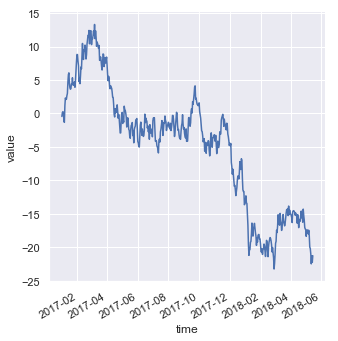

In [54]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(data = df, x = 'time', y = 'value', kind = 'line')
g.fig.autofmt_xdate()

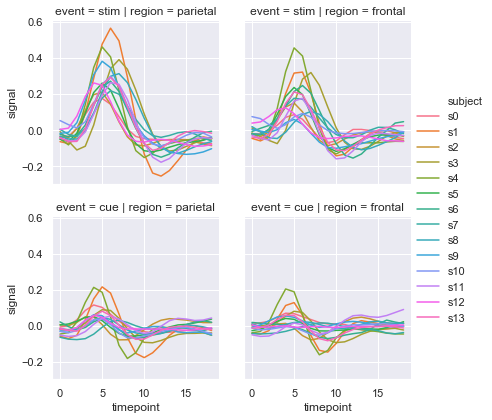

In [77]:
hue_order = ['s0', 's1', 's2', 's3', 's4', 's5', 's6','s7', 's8', 's9','s10', 's11', 's12', 's13']
g = sns.relplot(x = 'timepoint', y = 'signal', hue = 'subject', hue_order = hue_order, col = 'region', row = 'event', height = 3, kind = 'line', estimator = None, data = fmri)

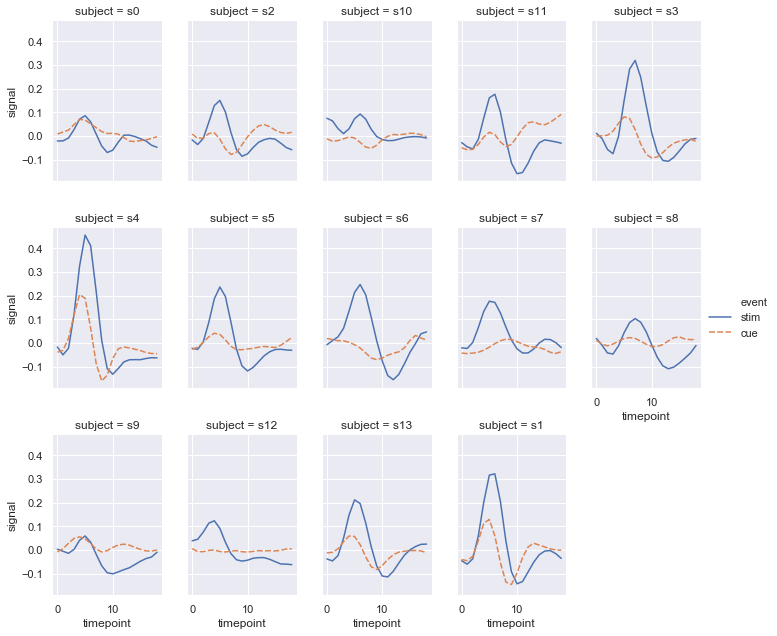

In [85]:
sns.relplot(data = fmri.query("region == 'frontal'"), x = 'timepoint', y = 'signal', ci = None, hue = 'event', style = 'event', col = 'subject', kind = 'line', col_wrap = 5, height = 3, aspect = 2/3)

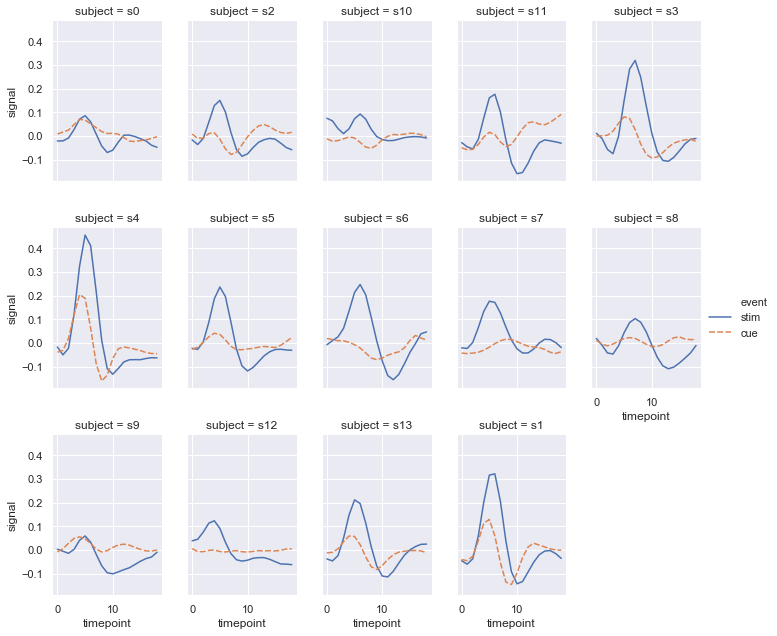

In [89]:
sns.relplot(data = fmri.set_index('region').loc['frontal'], 
            x = 'timepoint', 
            y = 'signal', 
            ci = None, 
            hue = 'event', 
            style = 'event', 
            col = 'subject', 
            kind = 'line', 
            col_wrap = 5, 
            height = 3, 
            aspect = 2/3)